In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from scipy.stats import norm, expon, truncnorm

In [2]:
FIGSIZE = (14,8)

In [3]:
df = pd.read_pickle('..//data//raw_data.pkl')

In [25]:
df.describe()

,AAPL,GE,BA,WMT,KO,JPM,CVX,CAH,XOM,IBM,INTC
count,7113.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7114.000000,7113.000000
mean,28.289037,16.493543,55.312598,36.883780,20.083142,29.686536,44.489173,31.802484,40.324755,78.786426,16.389886
std,43.039528,8.708866,53.024816,22.464718,11.398914,21.468610,34.532567,21.988505,27.364812,52.627419,10.799943
min,0.415743,1.963838,10.159097,3.494950,2.288171,1.382799,5.936076,1.687402,4.895955,7.056547,0.600942
25%,1.229236,8.811449,23.520638,10.739190,14.116934,14.639068,16.382365,14.258881,14.825284,26.112476,9.860075
50%,3.080479,17.730557,36.327812,38.652699,17.612696,27.657321,27.252469,32.214425,29.447601,70.895050,16.012265
75%,43.196105,23.359232,64.182988,46.009036,26.727743,36.316952,72.689655,39.384885,67.032577,123.949409,21.470148
max,181.720000,35.006100,364.640000,109.550000,48.530000,118.770000,133.600000,86.923126,92.545338,186.405408,52.480000


In [32]:
# how many periods are their in a year!
len(df.loc[df.index.year == 2000]) 

252

In [5]:
df.head()

,AAPL,GE,BA,WMT,KO,JPM,CVX,CAH,XOM,IBM,INTC
Date,,,,,,,,,,,
1990-01-02,1.118093,2.537067,11.542708,4.054211,2.693998,3.732964,6.386016,2.071873,5.371737,14.138144,0.742667
1990-01-03,1.125597,2.532126,11.824237,4.054211,2.655315,3.857396,6.282539,2.093233,5.318020,14.263656,0.722038
1990-01-04,1.129499,2.518063,11.777316,4.033561,2.642190,3.923345,6.201236,2.093233,5.264302,14.426678,0.737510
1990-01-05,1.133101,2.494118,11.614029,3.990541,2.620776,3.939734,6.108846,2.135952,5.237444,14.390611,0.732353
1990-01-08,1.140605,2.508561,11.752916,4.043886,2.676728,3.939734,6.167052,2.093233,5.318020,14.480057,0.742667


In [6]:
# daily change, no NaN values
df_change = df.pct_change().dropna()

In [7]:
df_change.describe()

,AAPL,GE,BA,WMT,KO,JPM,CVX,CAH,XOM,IBM,INTC
count,7113.000000,7113.000000,7113.000000,7113.000000,7113.000000,7113.000000,7113.000000,7113.000000,7113.000000,7113.000000,7113.000000
mean,0.001113,0.000388,0.000644,0.000566,0.000488,0.000761,0.000523,0.000653,0.000474,0.000484,0.000884
std,0.028246,0.017550,0.018735,0.016527,0.014102,0.024097,0.015341,0.018767,0.014528,0.017358,0.023979
min,-0.518692,-0.127891,-0.176254,-0.101832,-0.104742,-0.207274,-0.124891,-0.245396,-0.139525,-0.155398,-0.220234
25%,-0.012769,-0.007926,-0.009151,-0.007934,-0.006404,-0.010098,-0.007814,-0.008411,-0.007168,-0.007931,-0.011541
50%,0.000051,0.000000,0.000129,0.000000,0.000000,0.000000,0.000224,0.000000,0.000000,0.000115,0.000413
75%,0.014419,0.008651,0.010407,0.008657,0.007197,0.010684,0.008858,0.009709,0.008192,0.008681,0.013037
max,0.332152,0.197031,0.154627,0.110731,0.138795,0.250967,0.208542,0.203916,0.171905,0.131603,0.201229


In [8]:
df_change.to_pickle('..//data//clean_data.pkl')

/Users/Jeppe/.local/share/virtualenvs/ACFS-LPq-wnhy/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


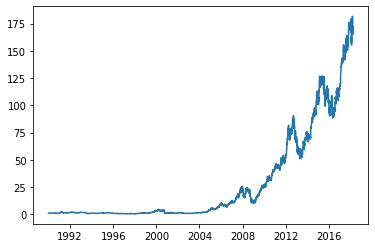

In [9]:
plt.plot(df['AAPL'])

In [10]:
def r():
    return np.random.normal(loc= 0.001113, scale=0.028246)

def simulation():
    X = np.empty(7113)
    a = 1.118093
    for ix in range(7113):
        a = (1 + r())*a
        X[ix] = a
    
    return X

In [11]:
N = 1000

sims = np.empty((N,7113))
for i in range(N):
    
    s = simulation()
    sims[i,:] = s


In [12]:
np.median(sims[:,7112])
#simulation seems reasonable.

211.5988538526684

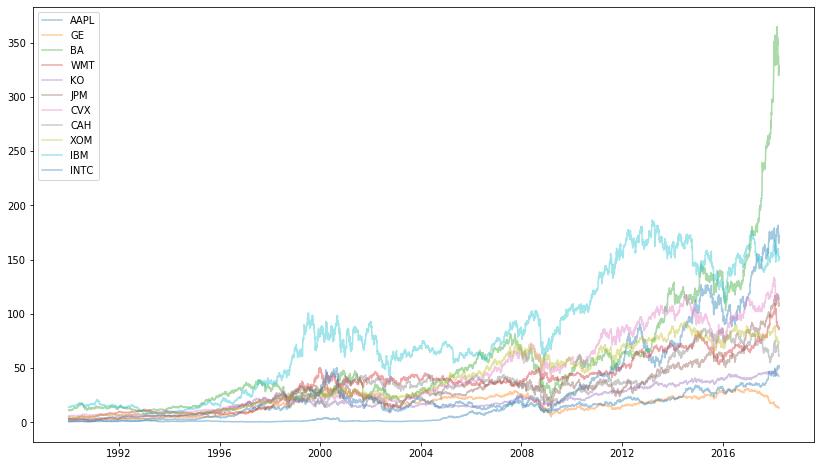

In [13]:
f, ax = plt.subplots(1,1,figsize=FIGSIZE)
for col in df.columns:
    ax.plot(df[col], alpha=0.4, label=col)
    
ax.legend()
f.savefig('..//figures//historicaltraces.png')

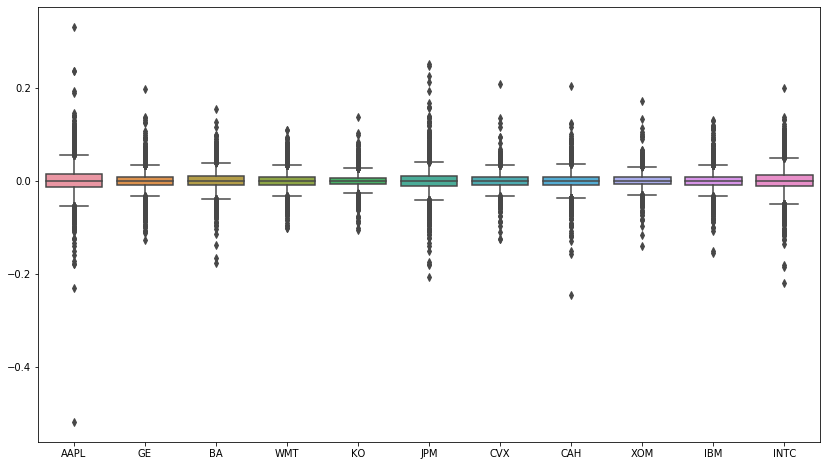

In [14]:
f, ax = plt.subplots(1,1,figsize=FIGSIZE)
ax = sbn.boxplot(data = df_change)
f.savefig('..//figures//boxplot.png')

### Seing if structural breaks is present in means

In [15]:
means = list()
_years = list(range(1991,2018))
_index = list()
for y in _years:
    if y%2 == 0:
        a = np.mean(df_change.loc[df_change.index.year==y])
        means.append(a)
        _index.append(y)

In [16]:
_index

[1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016]

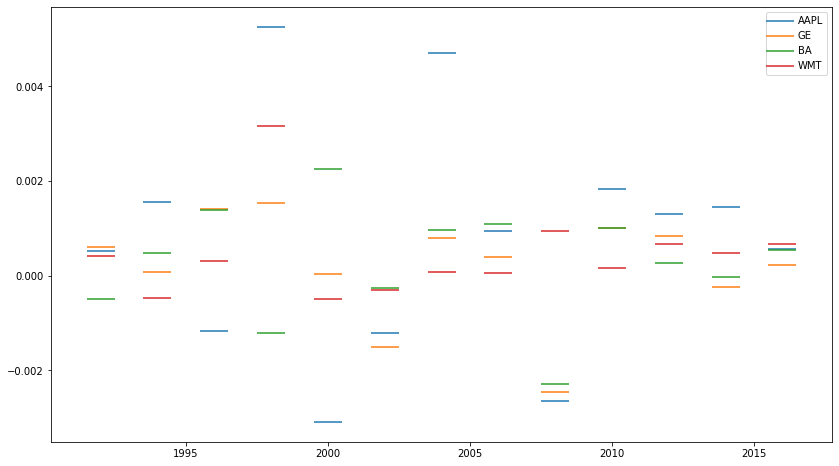

In [17]:
tmp = pd.DataFrame(means, index=_index)
df_means = pd.DataFrame(means, index=_index)

f, ax = plt.subplots(1,1, figsize=FIGSIZE)
for col in ['AAPL', 'GE', 'BA', 'WMT']:
    ax.scatter(x=tmp.index, y=tmp[col], marker='_', s=800, label=col)
ax.legend()

In [18]:
f.savefig('..//figures//structural_breaks_means.png')

In [108]:
covars = list()
_years = list(range(1991,2018))
_index = list()
for y in _years:
    if y%2 == 0:

        a = np.corrcoef(df_change.loc[df_change.index.year==y].T)
        covars.append(a.flatten())
        _index.append(y)

In [109]:
df_corr = pd.DataFrame(covars, index=_index)
tmp = pd.DataFrame(covars, index=_index)[[15,21,34,41]]

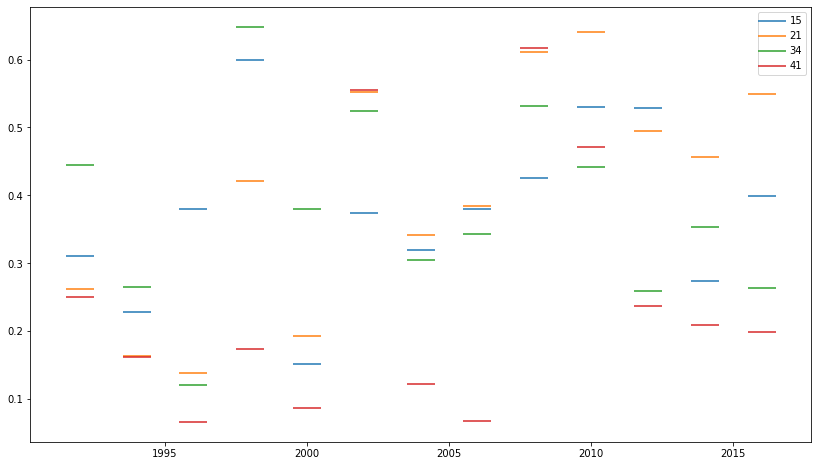

In [110]:
f, ax = plt.subplots(1,1, figsize=FIGSIZE)
for col in tmp.columns:
    ax.scatter(x=tmp.index, y=tmp[col], marker='_', s=800, label=col)
ax.legend()

In [24]:
f.savefig('..//figures//structural_breaks_covars.png')

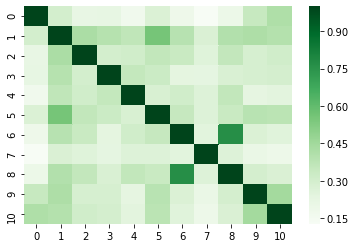

In [153]:
sbn.heatmap(np.corrcoef(np.array(df_change).T),cmap='Greens')

In [208]:
variances = list()
_years = list(range(1991,2018))
_index = list()
for y in _years:
    a = np.var(df_change.loc[df_change.index.year==y])
    variances.append(a)
    _index.append(y)

In [209]:
df_vars = pd.DataFrame(variances, index=_index)

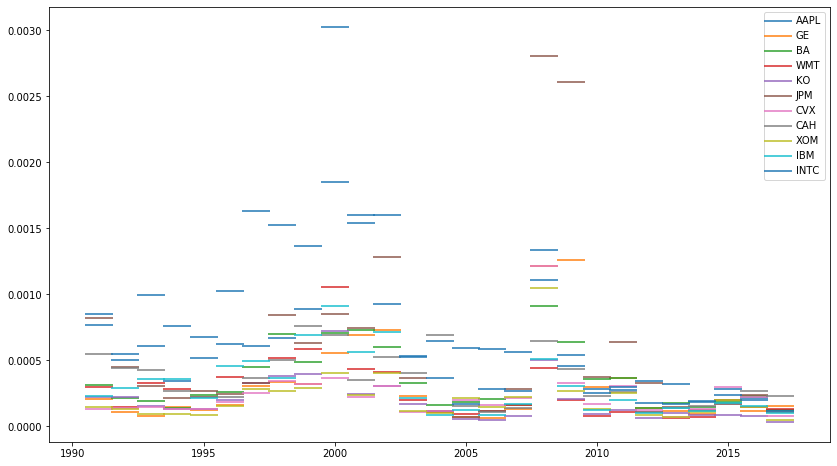

In [211]:
f, ax = plt.subplots(1,1, figsize=FIGSIZE)
for col in df_vars.columns:
    ax.scatter(x=df_vars.index, y=df_vars[col], marker='_', s=800, label=col)
ax.legend()

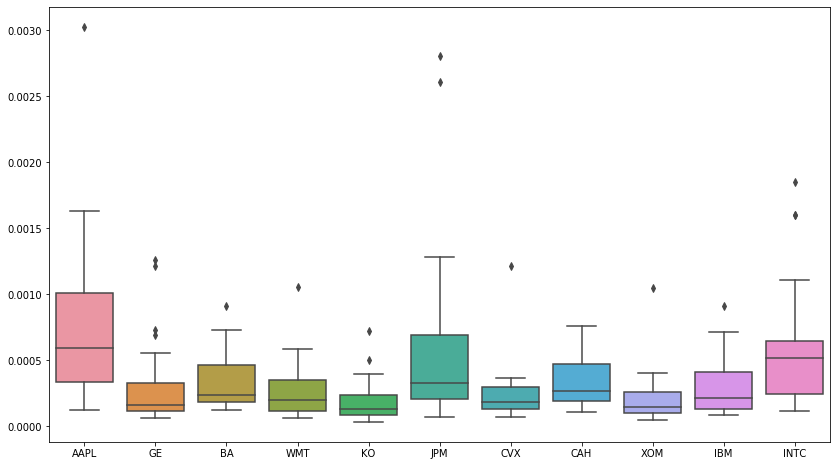

In [212]:
f, ax = plt.subplots(1,1, figsize=FIGSIZE)
ax = sbn.boxplot(data=df_vars)

In [190]:
covars = list()
_years = list(range(1991,2018))
_index = list()
for y in _years:
    if y%2 == 0:

        a = np.corrcoef(df_change.loc[df_change.index.year==y].T)
        covars.append(a.flatten())
        _index.append(y)

In [191]:
df_covars = pd.DataFrame(covars, index=_index)

In [192]:
_covars_array = np.array(df_covars).flatten()

In [193]:
_filter = lambda x: x<0.99
covars_array = list(filter(_filter, _covars_array))

In [199]:
mu, sigma = norm.fit(covars_array)

In [200]:
print(mu, sigma)

0.3132135477434142 0.18783547344913124


In [195]:
x = np.linspace(min(covars_array), max(covars_array), 100)
p = norm.pdf(x, mu, sigma)

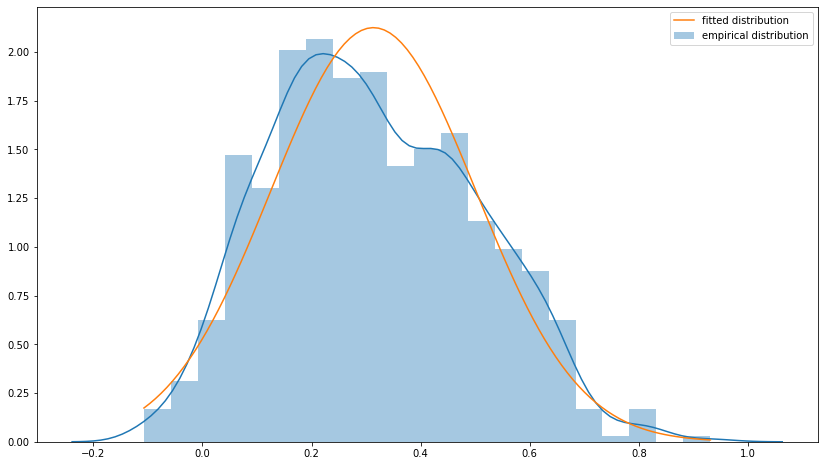

In [201]:
f, ax = plt.subplots(1,1,figsize=FIGSIZE)
ax = sbn.distplot(covars_array, label='empirical distribution')
ax.plot(x, p, label='fitted distribution')
ax.legend()

In [202]:
f.savefig('..//figures//correlation_distribution.png')

### Investigating Covariances

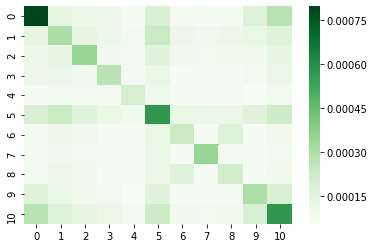

In [198]:
sbn.heatmap(np.cov(df_change.T), cmap='Greens')

### Investigating variances

In [266]:
vars_array = np.array(df_vars).flatten()
loc, scale = expon.fit(vars_array)
print(loc, scale)

3.190949824371116e-05 0.00034684353809659885


In [267]:
x = np.linspace(min(vars_array), max(vars_array), 100)
p = expon.pdf(x, 0, scale)

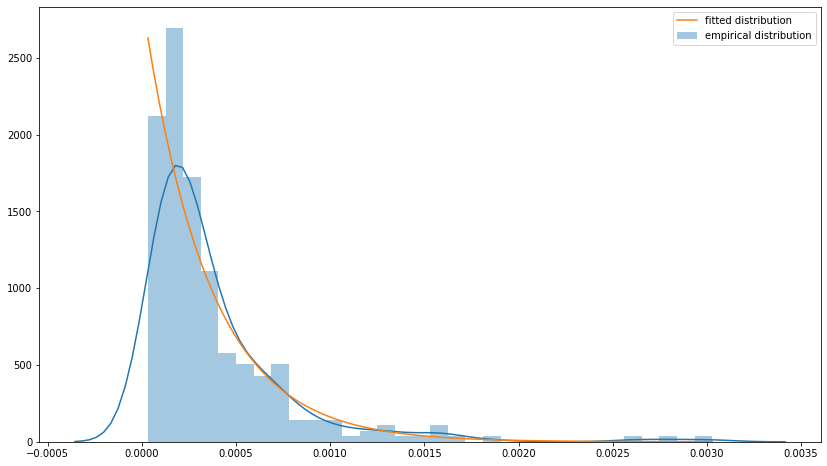

In [268]:
f, ax = plt.subplots(1,1,figsize=FIGSIZE)
ax = sbn.distplot(vars_array, label='empirical distribution')
ax.plot(x, p, label='fitted distribution')
ax.legend()

In [271]:
f.savefig('..//figures//distribution_variances.png')

### Covariance distribution

In [307]:
covars = list()
_years = list(range(1991,2018))
_index = list()
for y in _years:
    if y%2 == 0:

        a = np.cov(df_change.loc[df_change.index.year==y].T)
        covars.append(a.flatten())
        _index.append(y)

In [308]:
df_covars = pd.DataFrame(covars, index=_index)

In [310]:
_covars_array = np.array(df_covars).flatten()

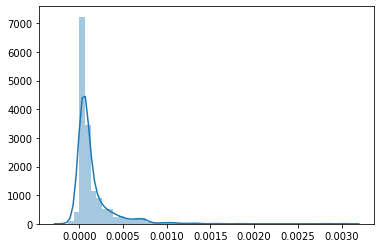

In [311]:
sbn.distplot(_covars_array)

### Distribution of means

0.0004612333818775558 0.001231415380377799


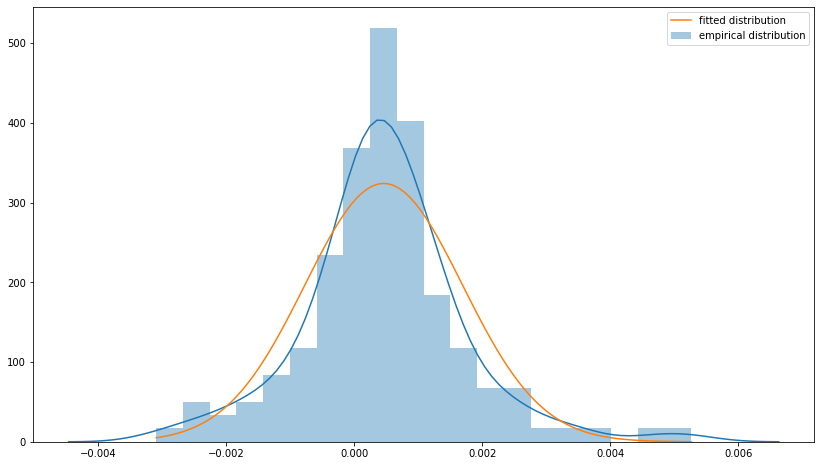

In [24]:
means_array = np.array(df_means).flatten()
mu_means, sigma_means = norm.fit(means_array)

x = np.linspace(min(means_array), max(means_array), 100)
p = norm.pdf(x, mu_means, sigma_means)

f, ax = plt.subplots(1,1, figsize=FIGSIZE)
ax = sbn.distplot(means_array, label='empirical distribution')
ax.plot(x, p, label='fitted distribution')
ax.legend()

print(mu_means, sigma_means)